In [50]:
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Traveling salesman problem

In [59]:
n = 90
A = np.random.uniform(size=(n,2))
order = np.arange(n)

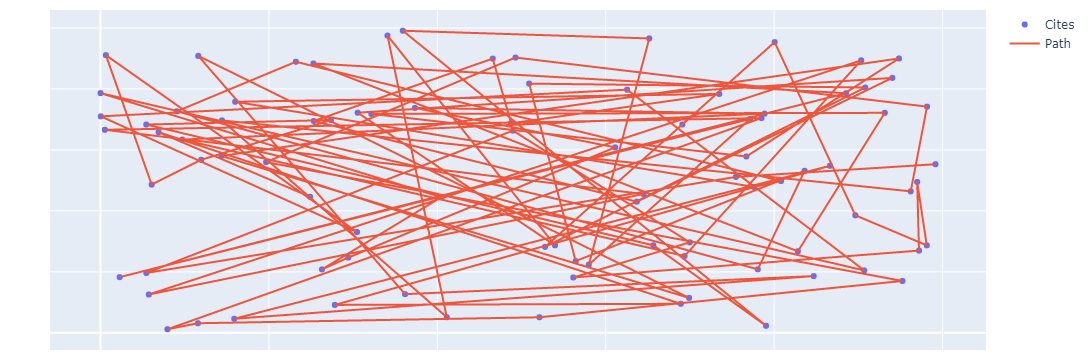

In [60]:
def plot_path(A, order):
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=A[:,0], y=A[:,1],
                    mode='markers',
                    name='Cites'))
    fig.add_trace(go.Scatter(x=A[order][:,0], y=A[order][:,1],
                    mode='lines',
                    name='Path'))
    
    fig.update_layout(
        width=500,
        height=350,
        margin=dict(l=50, r=10, t=10, b=10)
    )
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
    return fig
plot_path(A, order)

In [64]:
def walk_cost(order):
    dists = np.linalg.norm(A[order] - np.roll(A[order], shift=1, axis=0), axis=1)
    return dists[1:].sum()

print(f"Initial (random) path length: {walk_cost(order)}")

Initial (random) path length: 48.55216279501888


In [54]:
def arbitrary_swap(order, T):
    new_order = np.copy(order)
    a, b = np.random.randint(len(new_order), size=2)
    new_order[[a,b]] = new_order[[b,a]]
    return new_order

<AxesSubplot:xlabel='Temperature', ylabel='Acceptance rate (est)'>

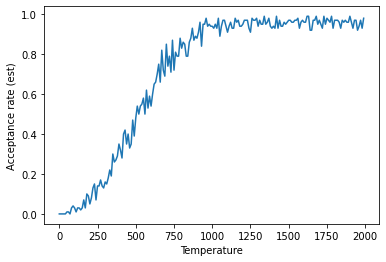

In [55]:
def accept_decision(T):
    return np.tanh((T-500)/300)>2*np.random.random()-0.92

X = [x for x in range(0, 2000, 10)]
Y = [sum([accept_decision(x) for _ in range(100)])/100 for x in X]
fig = sns.lineplot(x=X, y=Y)
fig.set( xlabel = "Temperature", ylabel = "Acceptance rate (est)")
fig

In [56]:
def tsp(x_0, cost_fun, step, decision_fun, T_0=2000, T_change_fun=None, iters=10**3, max_tries=100):
    x = x_0
    T = T_0
    T_change_fun = T_change_fun or (lambda x: 0.95*x)
    cost_hist = []
    T_hist = []
    last_cost = np.inf
    for _ in range(iters):
        for _ in range(max_tries):
            new_x = step(x)
            cost = cost_fun(new_x)
            if cost<last_cost or decision_fun(T):
                x = new_x
                last_cost = cost
                break
        cost_hist.append(last_cost)
        T_hist.append(T)
        T = T_change_fun(T)
        
    return x, cost_hist, T_hist

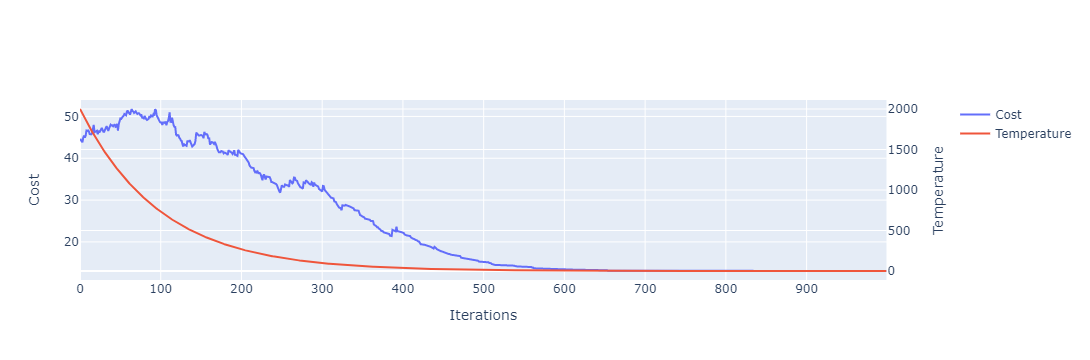

In [57]:
x, cost_hist, T_hist = tsp(x_0 = np.copy(order),
                        cost_fun = walk_cost,
                        step = arbitrary_swap,
                        decision_fun = accept_decision,
                        T_change_fun = lambda x: x*0.99)

X = list(range(len(cost_hist)))
         
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=X, y=cost_hist, name="Cost"), secondary_y=False)
fig.add_trace(go.Scatter(x=X, y=T_hist, name="Temperature"), secondary_y=True)
fig.update_xaxes(title_text="Iterations")
fig.update_yaxes(title_text="Cost", secondary_y=False)
fig.update_yaxes(title_text="Temperature", secondary_y=True)
fig.show()

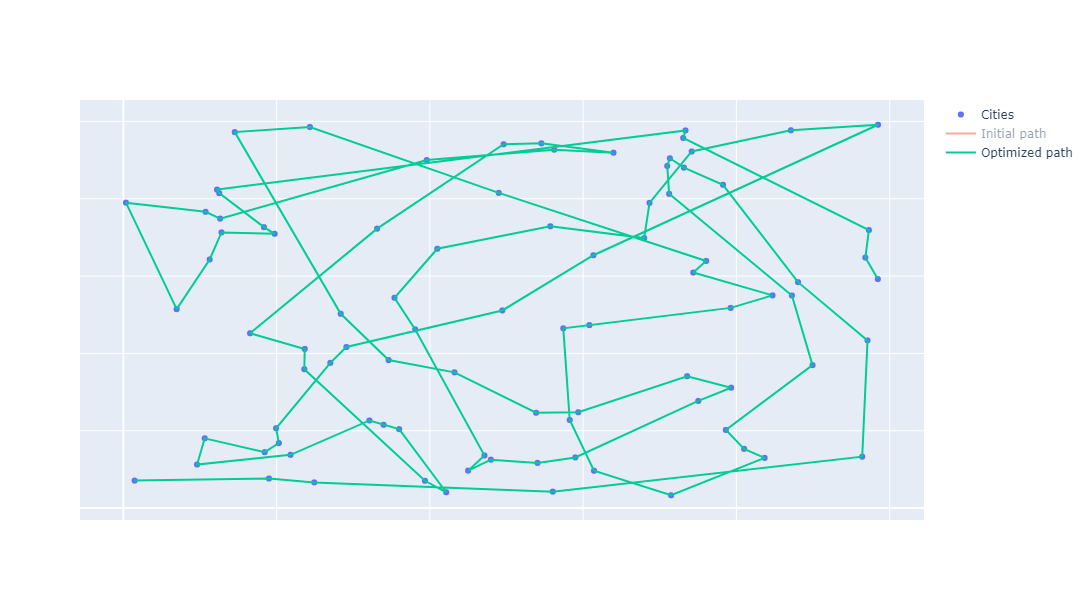

In [58]:
def plot_paths(A, order_initial, order_optimized):
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=A[:,0], y=A[:,1],
                    mode='markers',
                    name='Cities'))
    fig.add_trace(go.Scatter(x=A[order_initial][:,0], y=A[order_initial][:,1],
                    mode='lines',
                    name='Initial path',
                     visible='legendonly'))
    fig.add_trace(go.Scatter(x=A[order_optimized][:,0], y=A[order_optimized][:,1],
                    mode='lines',
                    name='Optimized path'))
    
    fig.update_layout(
        width=800,
        height=600,
    )
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
    return fig

plot_paths(A, order, x)